In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [38]:
#Raw Data
# Load the raw data into a Pandas DataFrame
data = pd.read_csv('credit-dataset.csv')

# Clean and preprocess the data
# Handle missing values
data = data.dropna()

# Encode categorical variables
categorical_cols = ['residence_status', 'employment', 'other_credits', 'status']
data = pd.get_dummies(data, columns=categorical_cols)

# Scale the numerical variables
numerical_cols = ['customer_id', 'customer_age', 'months_at_address','income', 'months_with_bank','balance']
data[numerical_cols] = (data[numerical_cols] - data[numerical_cols].mean()) / data[numerical_cols].std()

data = data.reset_index(drop=True)
# Split the data into X (features) and y (target variable)
#X = data.drop('default', axis=1)
#y = data['default']


In [39]:
# Definir X e Y
X = data.drop(['status_0'], axis=1)
Y = data['status_0']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression()


In [40]:
# Entrenar el modelo de regresión logística

model.fit(X_train, Y_train)



LogisticRegression()

In [41]:
# Realizar predicciones en los datos de prueba
Y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(Y_test, Y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 1.0


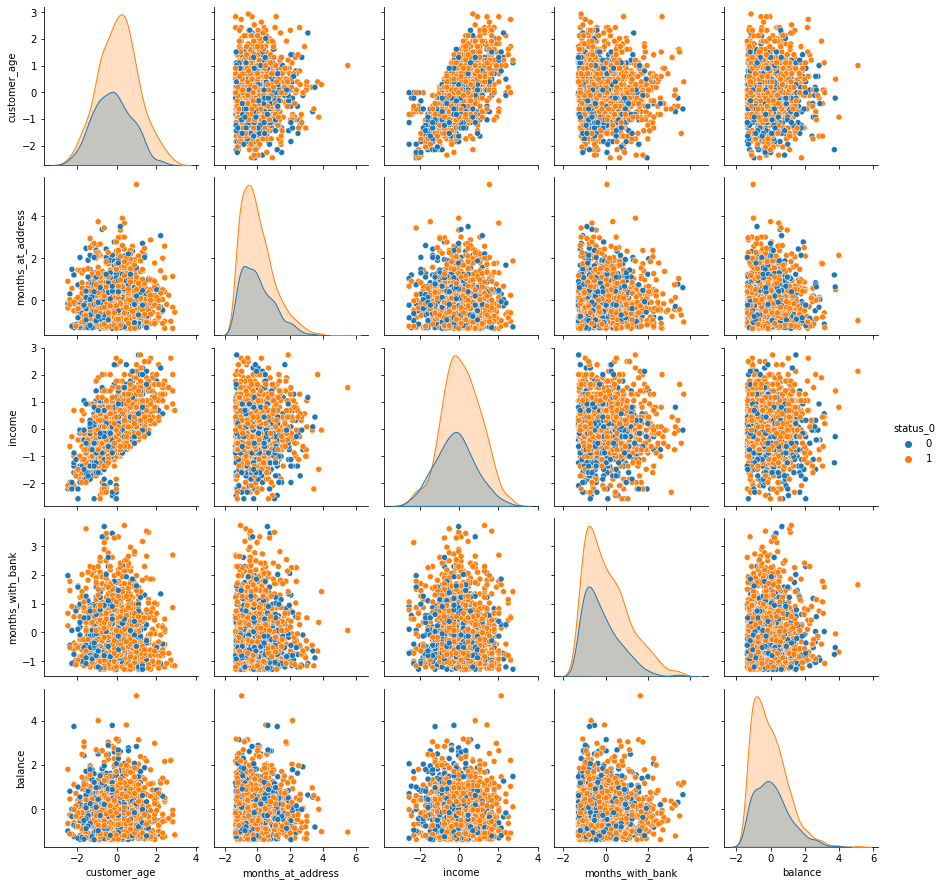

In [42]:
predictors = ['customer_age', 'months_at_address', 'income', 'months_with_bank', 'balance']
sns.pairplot(data, vars=predictors, hue='status_0')
plt.show()